In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from PIL import Image
from tqdm import tqdm
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Visual Inspection

In [29]:
def inspect_classes(data_dir):
    classes = [c for c in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, c))]
    print(f"Total Classes Found: {len(classes)}")

    class_counts = {c: len(os.listdir(os.path.join(data_dir, c))) for c in classes}
    counts = list(class_counts.values())

    plt.figure(figsize=(12, 4))
    sns.histplot(counts, bins=20, kde=False)
    plt.title("Distribution of Images per Class")
    plt.xlabel("Number of Images")
    plt.ylabel("Number of Classes")
    plt.show()
    
    if len(set(counts)) == 1:
        print(f"PERFECT BALANCE: All classes have exactly {counts[0]} images.")
    else:
        print(f"IMBALANCE DETECTED: Min {min(counts)} | Max {max(counts)}")


def get_mean_std(loader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0

    print("Calculating Mean and Std...")
    for data, _ in tqdm(loader):
        channels_sum += torch.mean(data, dim=[0,2,3])
        channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1

    mean = channels_sum / num_batches

    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

    return mean, std

## Train

Total Classes Found: 200


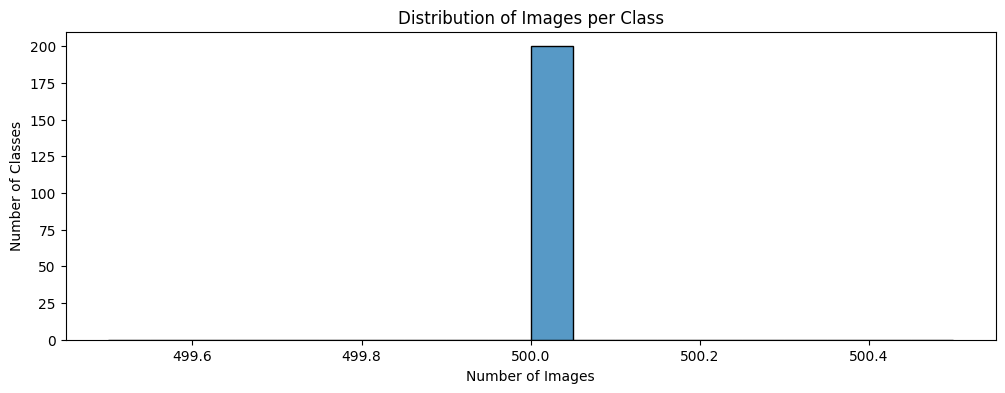

PERFECT BALANCE: All classes have exactly 500 images.


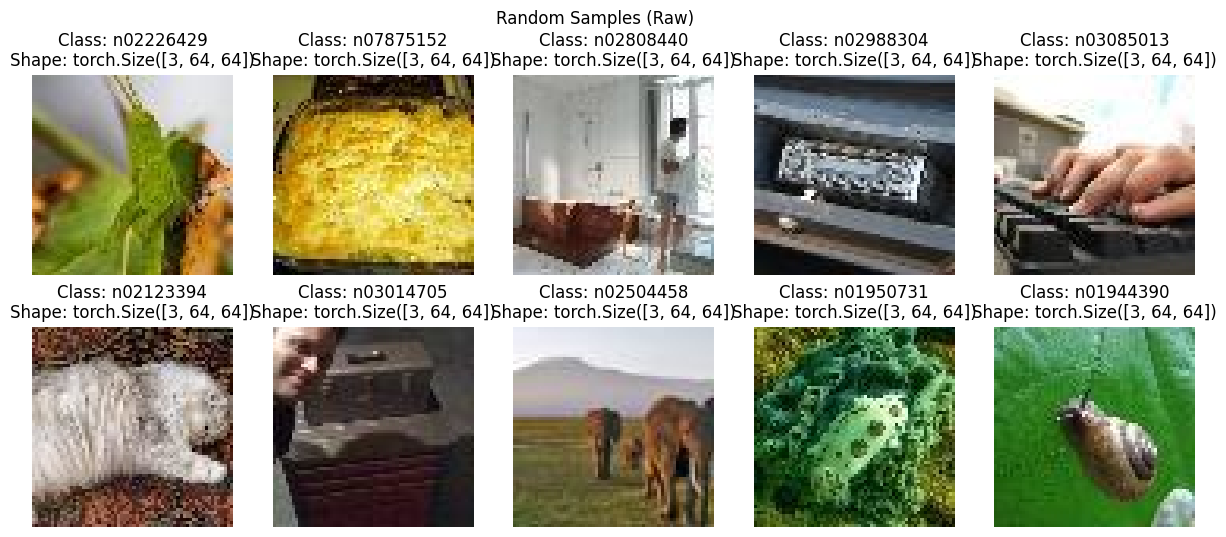

Calculating Mean and Std...


100%|██████████| 782/782 [00:35<00:00, 22.09it/s] 


Computed Mean: tensor([0.4802, 0.4480, 0.3980])
Computed Std:  tensor([0.2756, 0.2684, 0.2805])


In [ ]:
# Configuration
DATA_DIR = f'../data/tiny-imagenet-200/train'
BATCH_SIZE = 128
print(f"Scanning data from: {DATA_DIR}")

dataset = datasets.ImageFolder(root=DATA_DIR, transform=transforms.ToTensor())
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

inspect_classes(DATA_DIR)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
indices = np.random.choice(len(dataset), 10, replace=False)

for i, ax in enumerate(axes.flat):
    img, label = dataset[indices[i]]
    ax.imshow(img.permute(1, 2, 0))
    ax.axis('off')
    ax.set_title(f"Class: {dataset.classes[label]}\nShape: {img.shape}")
plt.suptitle("Random Samples (Raw)")
plt.show()

# Calculate Stats
mean, std = get_mean_std(loader)
print(f"\nComputed Mean: {mean}")
print(f"Computed Std:  {std}")

## Val

Scanning data from: ../data/tiny-imagenet-200/val
Total Classes Found: 200


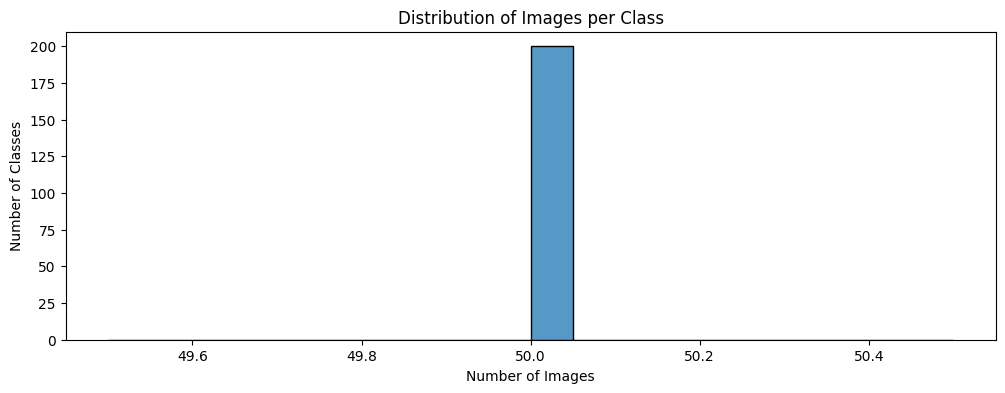

PERFECT BALANCE: All classes have exactly 50 images.


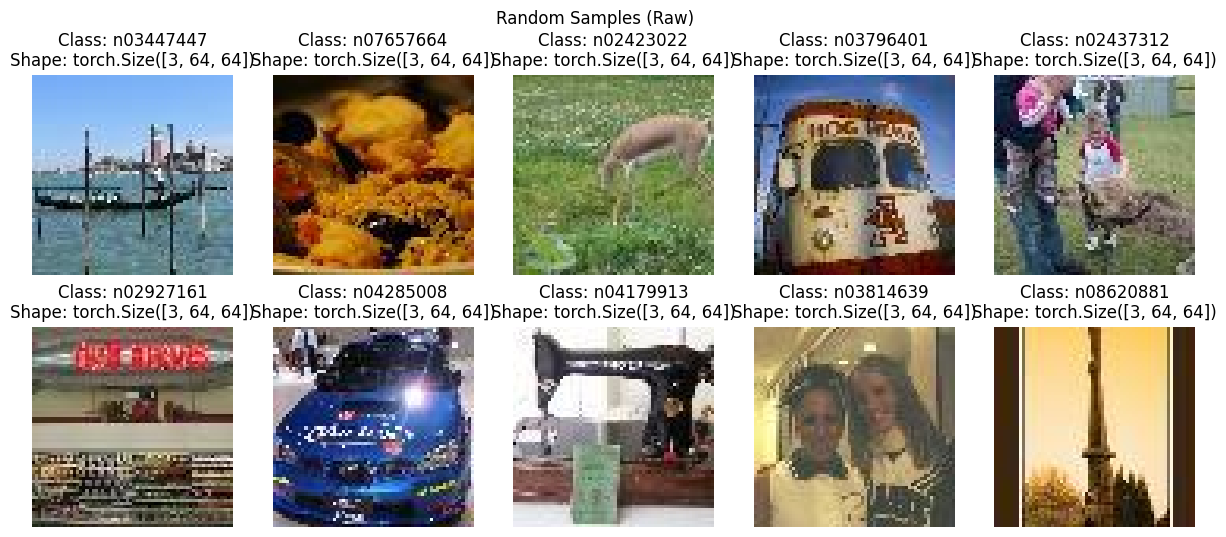

Calculating Mean and Std...


100%|██████████| 79/79 [00:26<00:00,  2.98it/s]


Computed Mean: tensor([0.4835, 0.4492, 0.3968])
Computed Std:  tensor([0.2763, 0.2684, 0.2817])


In [30]:
# Configuration
DATA_DIR = f'../data/tiny-imagenet-200/val'
BATCH_SIZE = 128
print(f"Scanning data from: {DATA_DIR}")

dataset = datasets.ImageFolder(root=DATA_DIR, transform=transforms.ToTensor())
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

inspect_classes(DATA_DIR)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
indices = np.random.choice(len(dataset), 10, replace=False)

for i, ax in enumerate(axes.flat):
    img, label = dataset[indices[i]]
    ax.imshow(img.permute(1, 2, 0))
    ax.axis('off')
    ax.set_title(f"Class: {dataset.classes[label]}\nShape: {img.shape}")
plt.suptitle("Random Samples (Raw)")
plt.show()

# Calculate Stats
mean, std = get_mean_std(loader)
print(f"\nComputed Mean: {mean}")
print(f"Computed Std:  {std}")